## 1. Importance des Librairies

In [153]:
# Importance des librairies

import numpy as np
import pandas as pd

## 2. Chargement des donnees

In [154]:
# Chargement des donnees

data = pd.read_csv('Data/studentscores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3. Analyse des donnees

### a. isnull()

In [184]:
# 1. isnull

data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### b. isnull().sum()

In [185]:
# isnull().sum() : Permet d'afficher le nombre de lignes vide (null)

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### c. info()

In [186]:
# data.info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


### d. max()

In [187]:
# max()

data['Hours'].max()


9.2

### e. min()

In [188]:
# min()

data['Hours'].min()

1.1

In [189]:
print('Score Max: ', data['Scores'].max())

Score Max:  95


In [190]:
print('Score Min: ', data['Scores'].min())

Score Min:  17


## 4. Division des donnees

In [162]:
# Donnees
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Variables Independantes et Dependantes: X et Y

In [191]:
### Variables Dependantes

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

### a. X: Hours

In [193]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


### b. Y: Scores

In [195]:
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

### .values

In [197]:
## '.values' 
#    Permet de structurer les donnees sous forme de tableau numpy (numpy array)

In [201]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

### X

In [202]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### Y

In [203]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### 4.1 Separation des donnees : Train et Test

In [167]:
## Importation de train_test_split

from sklearn.model_selection import train_test_split

In [168]:
## X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (18, 1)
X_test shape: (7, 1)
Y_train shape: (18,)
Y_test shape: (7,)


### 5. Construction du modele

In [169]:
## Importation

from sklearn.linear_model import LinearRegression

In [170]:
## Creation du modele

modele_lineaire = LinearRegression()

In [226]:
## Entrainement du modele a l'aide de X_train et Y_train

modele_lineaire.fit(X_train, Y_train)

LinearRegression()

### 6. Prediction

#### Y_scores_predits

In [227]:
## Prediction a l'aide des X_test

Y_scores_predits = modele_lineaire.predict(X_test)

Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

#### Comparaison avec Y_test

In [173]:
## Comparaison avec Y_test

Y_test

array([95, 86, 17, 69, 42, 75, 54], dtype=int64)

In [228]:
resultats = pd.DataFrame(Y_test, Y_scores_predits)

resultats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


#### Embelir l'affichage

In [229]:
resultats = pd.DataFrame({'Y-score-reel': Y_test, 'Y-scores-predits': Y_scores_predits})

resultats

,Y-score-reel,Y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


### 7. Evaluation du modele

In [175]:
## Importations

from sklearn.metrics import mean_squared_error, r2_score

In [235]:
## mean_squared_error

print('MSE de la Regression Lineaire:', mean_squared_error(Y_test, Y_scores_predits))

# le resultat doit etre le plus eleve possible

MSE de la Regression Lineaire: 51.90159659147336


In [236]:
## r2_score

print('r2_score de la Regression Lineaire:', r2_score(Y_test, Y_scores_predits))

# Le resultat doit etre le plus bas possible

r2_score de la Regression Lineaire: 0.9168569951293908


### 8. Visualisation

In [179]:
## Importation de matplotlib

import matplotlib.pyplot as plt

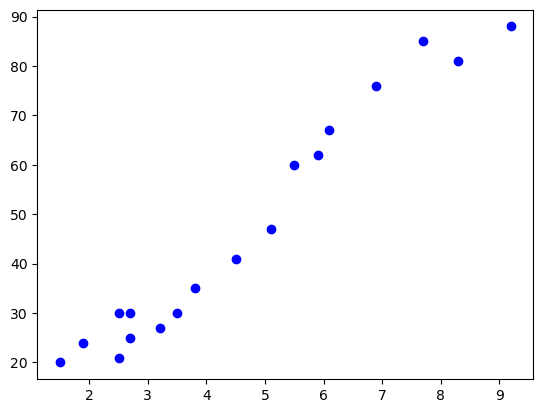

In [204]:
## Scatter: eparpiller

plt.scatter(X_train, Y_train, color='blue', label='Train data')
plt.show()

#### Rajoutons des plots

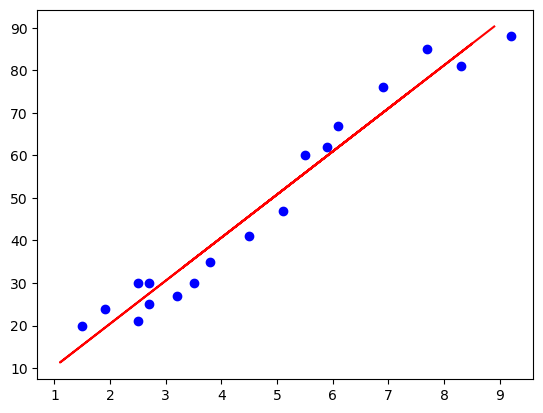

In [205]:
## Rajoutons des plots
plt.scatter(X_train, Y_train, color='blue', label='Train data')
plt.plot(X_test, Y_scores_predits, color='red', label='Ligne de la Regression Lineaire')
plt.show()

In [182]:
## Erreur a ne pas commettre

## cmd: plt.plot(X_train, Y_scores_predits, color='red', label='Ligne de la Regression Lineaire')

# L'erreur est due au fait que 'X_train' et 'Y_scores_predits' n'ont pas la meme dimension
# car 'Y_scores_predits' a ete obtenu a l'aide de 'X_test' et non X_train

#### Enrichissons un peu notre graphique

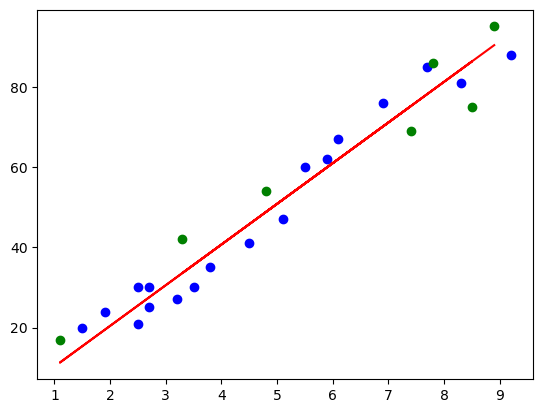

In [206]:
plt.scatter(X_train, Y_train, color='blue', label='Train data')
plt.scatter(X_test, Y_test, color='green', label='Test data')
plt.plot(X_test, Y_scores_predits, color='red', label='Ligne de la Regression Lineaire')
##plt.xlabel()
plt.show()

### 9. Prediction simple

In [208]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [223]:
resultats = pd.DataFrame({'Y-score-reel': Y_test, 'Y-scores-predits': Y_scores_predits})

resultats

,Y-score-reel,Y-scores-predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [230]:
Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [215]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [232]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [234]:
resultats = pd.DataFrame({'Y-score-reel': Y_test, 'Y-scores-predits': Y_scores_predits, 'Difference': Y_test-Y_scores_predits})

resultats

,Y-score-reel,Y-scores-predits,Difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


## Regression Lineaire Multiple